<a href="https://colab.research.google.com/github/Akashkunwar/Dscourses/blob/main/Guvi/Project/Chennai_house_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chennai House Price Prediction

##Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

##Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.








###For every feature:
1. missing values
2.  outliers
3.  spelling mistakes
4.  data in the right format

###EDA:
####for every feature : plot:
1. distribution of the
feature
2. IMPORTANT : ft vs target




In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Project/train-chennai-sale.csv")
pd.set_option('display.max_columns', None)
data.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


# Data Cleaning

In [3]:
# Removing all the null values
data.dropna(inplace=True)

# Renaming all the column names in lowercase letters
data.columns = data.columns.str.lower()


# Renaming all the string in area column names in lowercase letters
data.area = data.area.str.lower()

# Correcting the spelling mistakes in area columns
data.area = data.area.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})


# Renaming all the string in sale_cond column names in lowercase letters
data.sale_cond = data.sale_cond.str.lower()

# Correcting the spelling mistakes in sale_cond columns
data.sale_cond = data.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})


# Renaming all the string in park_facil column names in lowercase letters
data.park_facil = data.park_facil.str.lower()

# Correcting the spelling mistakes in park_facil columns
data.park_facil = data.park_facil.replace({'noo':'no'})


# Renaming all the string in buildtype column names in lowercase letters
data.buildtype = data.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
data.buildtype = data.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})


# Renaming all the string in utility_avail column names in lowercase letters
data.utility_avail = data.utility_avail.str.lower()

# Correcting the spelling mistakes in utility_avail columns
data.utility_avail = data.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})
                                            
                                            
# Renaming all the string in street column names in lowercase letters
data.street = data.street.str.lower()

# Correcting the spelling mistakes in street columns
data.street = data.street.replace({'pavd':'paved', 
                       'noaccess':'no access'})


# Renaming all the string in mzzone column names in lowercase letters
data.mzzone = data.mzzone.str.lower()

# Fixing the correct Data Type of columns
data.n_bedroom = data.n_bedroom.astype(int)
data.n_bathroom = data.n_bathroom.astype(int)

# Correcting Date columnd from object to daterime format
data.date_sale = pd.to_datetime(data.date_sale, format='%d-%m-%Y')
data.date_build = pd.to_datetime(data.date_build, format='%d-%m-%Y')

# Creating property_age column which deternine how old the property id
data['property_age'] = pd.DatetimeIndex(data.date_sale).year - pd.DatetimeIndex(data.date_build).year

# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
data['total_price'] = pd.DataFrame(data.reg_fee	+ data.commis	+ data.sales_price)

# Rearranging the columns of dataframe 
data = data.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])

# Exploratory Data Analysis

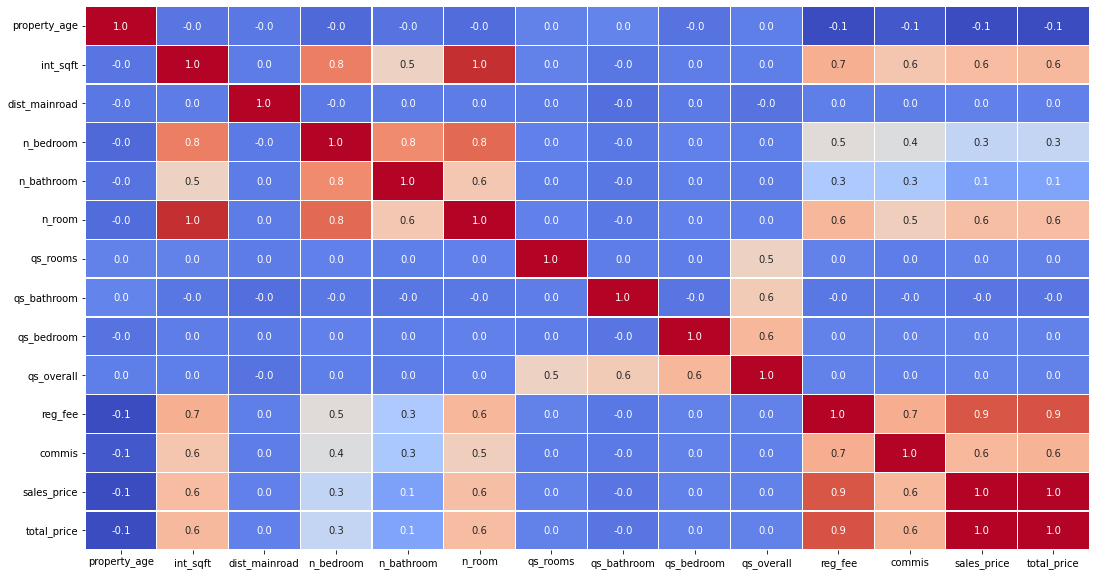

In [4]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

## **Distribution Of Features in Data Columns**

Here as we can see the distribution of all the columns whether the data is normally distributed or skewed.

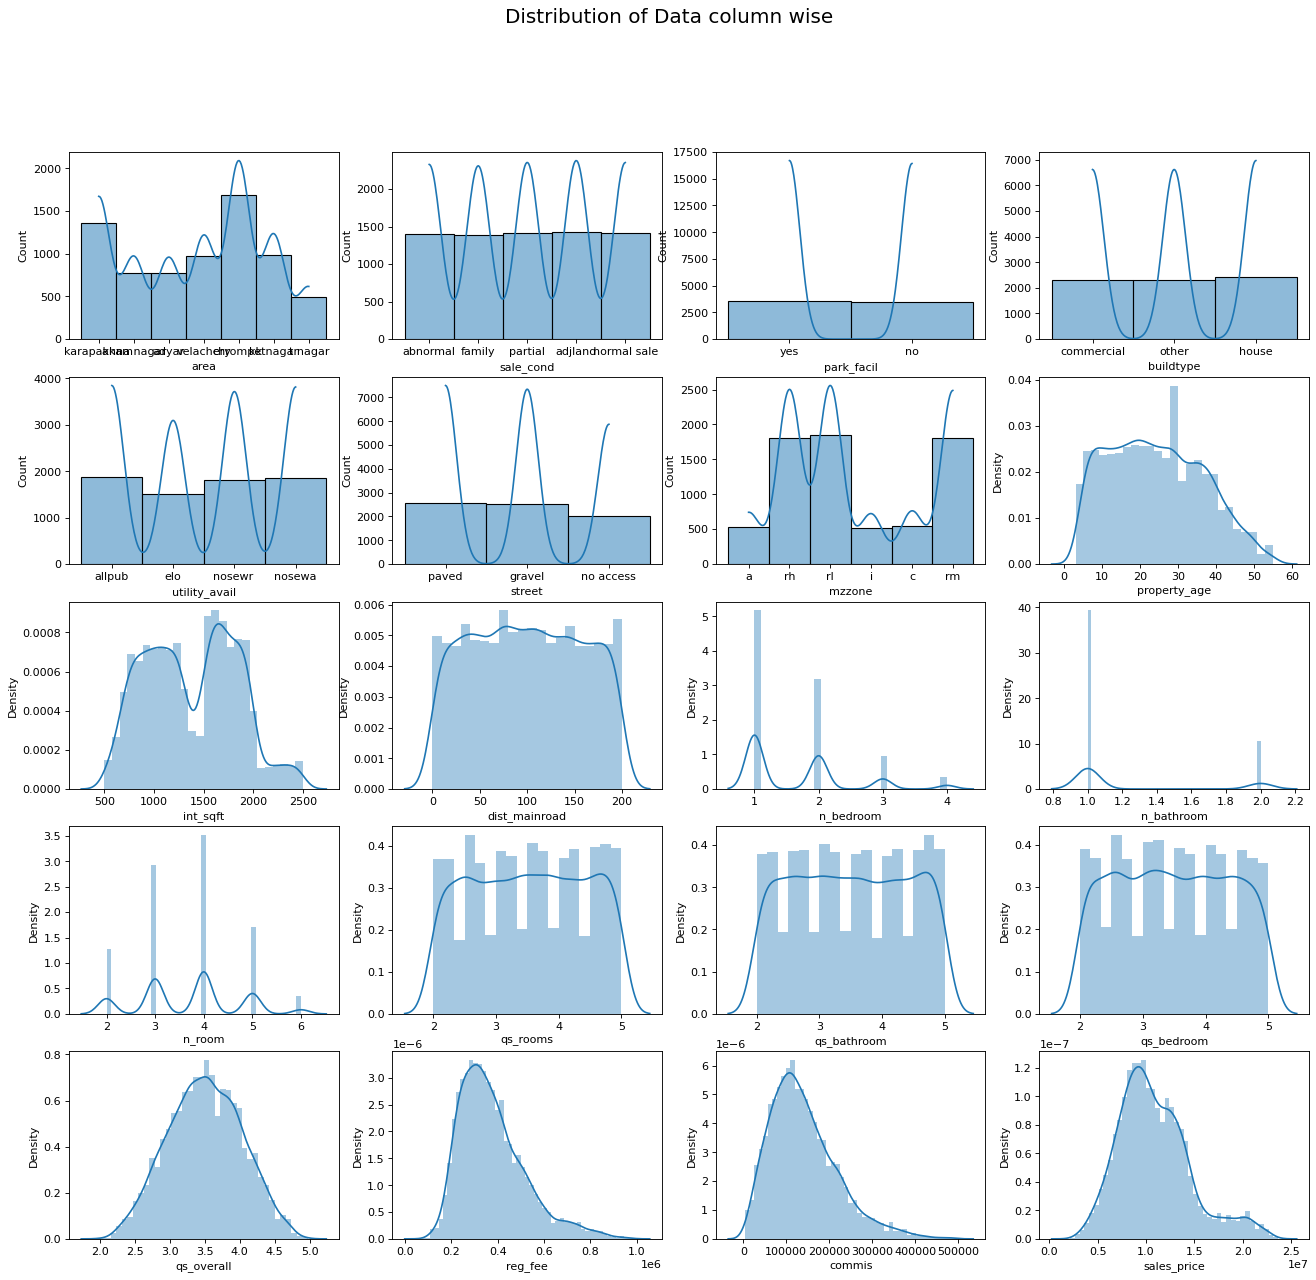

In [5]:
plt.figure(figsize=(20, 18), dpi=80)

plt.subplot(5,4,1)
sns.histplot(data.area,kde=True)
# sns.distplot(data.area)

plt.subplot(5,4,2)
sns.histplot(data.sale_cond,kde=True)
# sns.distplot(data.sale_cond)

plt.subplot(5,4,3)
sns.histplot(data.park_facil,kde=True)
# sns.distplot(data.park_facil)

plt.subplot(5,4,4)
sns.histplot(data.buildtype,kde=True)
# sns.distplot(data.buildtype)

plt.subplot(5,4,5)
sns.histplot(data.utility_avail,kde=True)
# sns.distplot(data.utility_avail)

plt.subplot(5,4,6)
sns.histplot(data.street,kde=True)
# sns.distplot(data.street)

plt.subplot(5,4,7)
sns.histplot(data.mzzone,kde=True)
# sns.distplot(data.mzzone)

plt.subplot(5,4,8)
sns.distplot(data.property_age)#.set(title='Age of Property')

plt.subplot(5,4,9)
sns.distplot(data.int_sqft)#.set(title='Int Square feet')

plt.subplot(5,4,10)
sns.distplot(data.dist_mainroad)#.set(title='Distance from Main-road')

plt.subplot(5,4,11)
sns.distplot(data.n_bedroom)#.set(title='No. of Bedroom')

plt.subplot(5,4,12)
sns.distplot(data.n_bathroom)#.set(title='No. of Bathroom')

plt.subplot(5,4,13)
sns.distplot(data.n_room)#.set(title='No. of room')

plt.subplot(5,4,14)
sns.distplot(data.qs_rooms)#.set(title='No. of room')

plt.subplot(5,4,15)
sns.distplot(data.qs_bathroom)#.set(title='QS_BATHROOM')

plt.subplot(5,4,16)
sns.distplot(data.qs_bedroom)#.set(title='QS_BEDROOM')

plt.subplot(5,4,17)
sns.distplot(data.qs_overall)#.set(title='QS_OVERALL')

plt.subplot(5,4,18)
sns.distplot(data.reg_fee)#.set(title='Registration fee')

plt.subplot(5,4,19)
sns.distplot(data.commis)#.set(title='Commission')

plt.subplot(5,4,20)
sns.distplot(data.sales_price)#.set(title='Sale Price')

plt.suptitle("Distribution of Data column wise", fontsize=18)
plt.show()

# Plotting Features column vs Target column

Here we plot two type of data:
*   Numerical Columns
*   Categorical Columns


## Plotting of Numerical data vs Target
Here we are plotting all our Numerical columns with total price of the house to figure out, is there any relation between numerical features column and total sales.

#### Here we plot 2 type of numerical data:


1.   Continous numerical variable
2.   Decsrete numerical variable



# Numerical Columns
1) Continous numerical variable
Here we are plotting all our Continous numerical variable columns with total price of the house to figure out, is there any relation between Continous numerical variable features column and total sales.

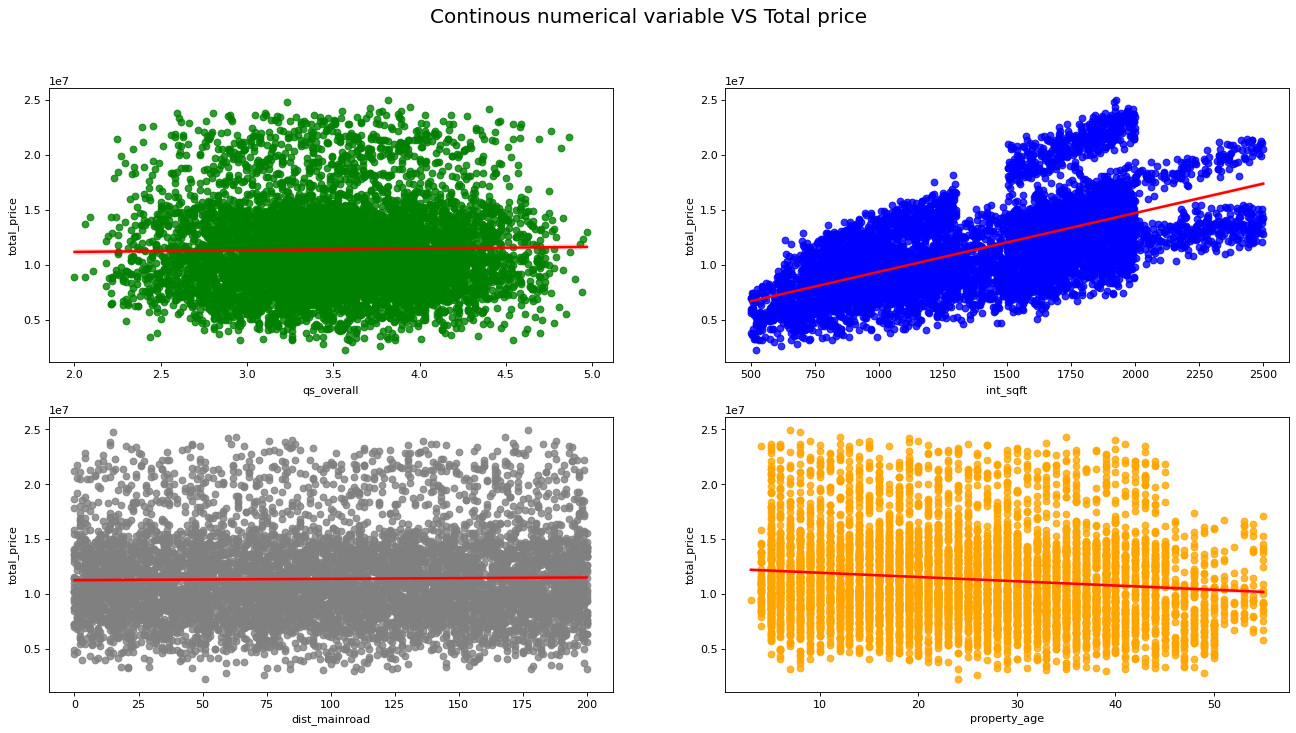

In [6]:
plt.figure(figsize=(20, 10), dpi=80)

plt.subplot(2,2,1)
sns.regplot(data.qs_overall, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(data.int_sqft, data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(data.dist_mainroad, data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(data.property_age, data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)
plt.show()

2) Decsrete numerical variable

Here we are plotting all our Decsrete numerical variable columns with total price of the house to figure out, is there any relation between Decsrete numerical variable features column and total sales.

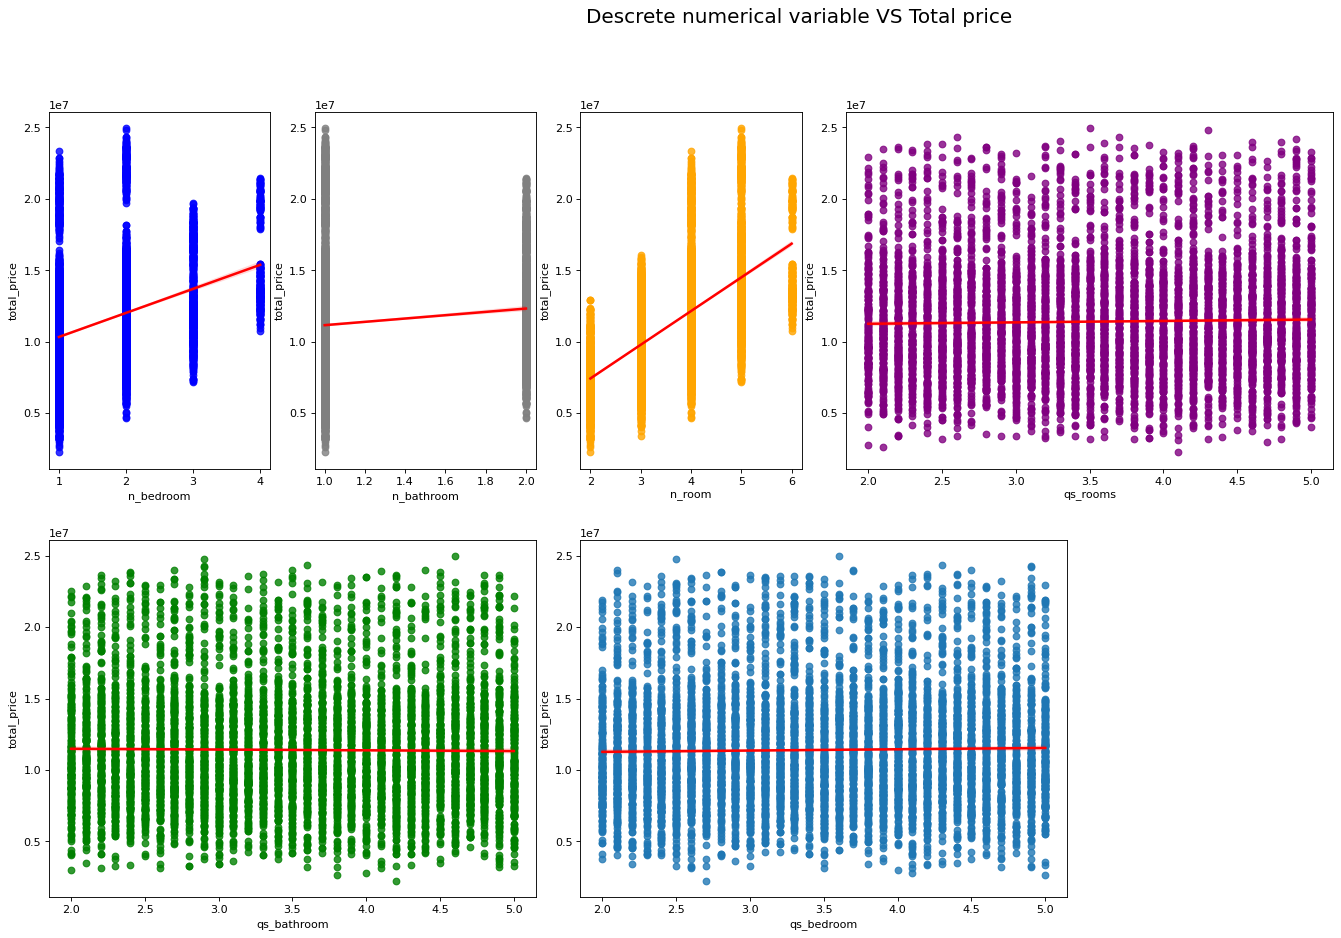

In [7]:
plt.figure(figsize=(25, 13), dpi=80)
# sns.set(style="whitegrid")

plt.subplot2grid((2,6),(0,0))
sns.regplot(data.n_bedroom, data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(data.n_bathroom, data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(data.n_room, data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(data.qs_rooms, data.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(data.qs_bathroom, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(data.qs_bedroom, data.total_price, line_kws={"color": "red"})
# plt.ticklabel_format(style='plain', axis='y')

plt.suptitle("Descrete numerical variable VS Total price", fontsize=18)
plt.show()

### Commision and Registration fee columns:
On top of all numerical columns we are given registration fee and commission columns on which sales price don't depends on but these two columns are completly depended on sales column value. That means after determining the sales price the commission and registration fee are paid.
  Hence, these two columns don't directly contribute to determine the sale we can add value of these two column on sales column and try to predict total sale price. And at the end compare this result with only predicted sales price.

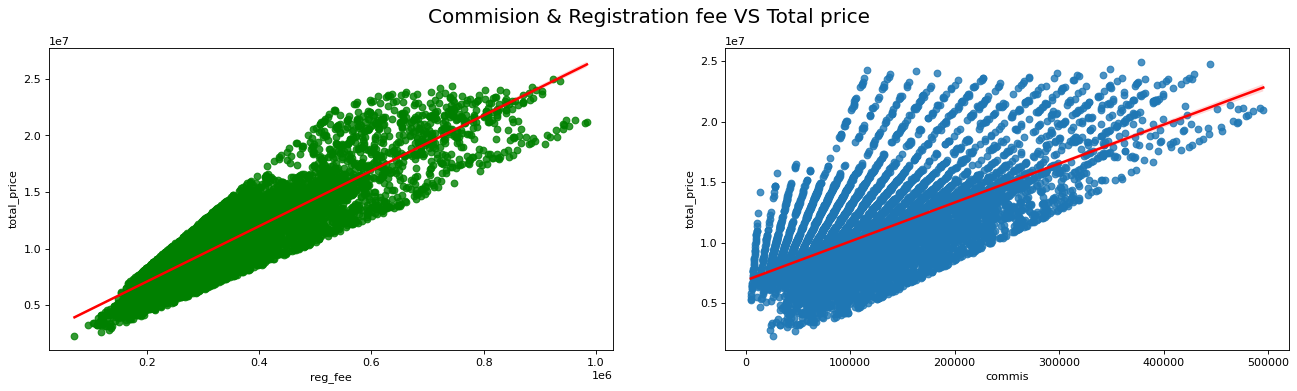

In [8]:
plt.figure(figsize=(20, 5), dpi=80)

plt.subplot(1,2,1)
sns.regplot(data.reg_fee, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(data.commis, data.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

# Categorical Columns
### Plotting of Categorical data vs Target
Here we are plotting all our catagorical columns with total price of the house to figure out, is there any relation between catagorical features column and total sales.

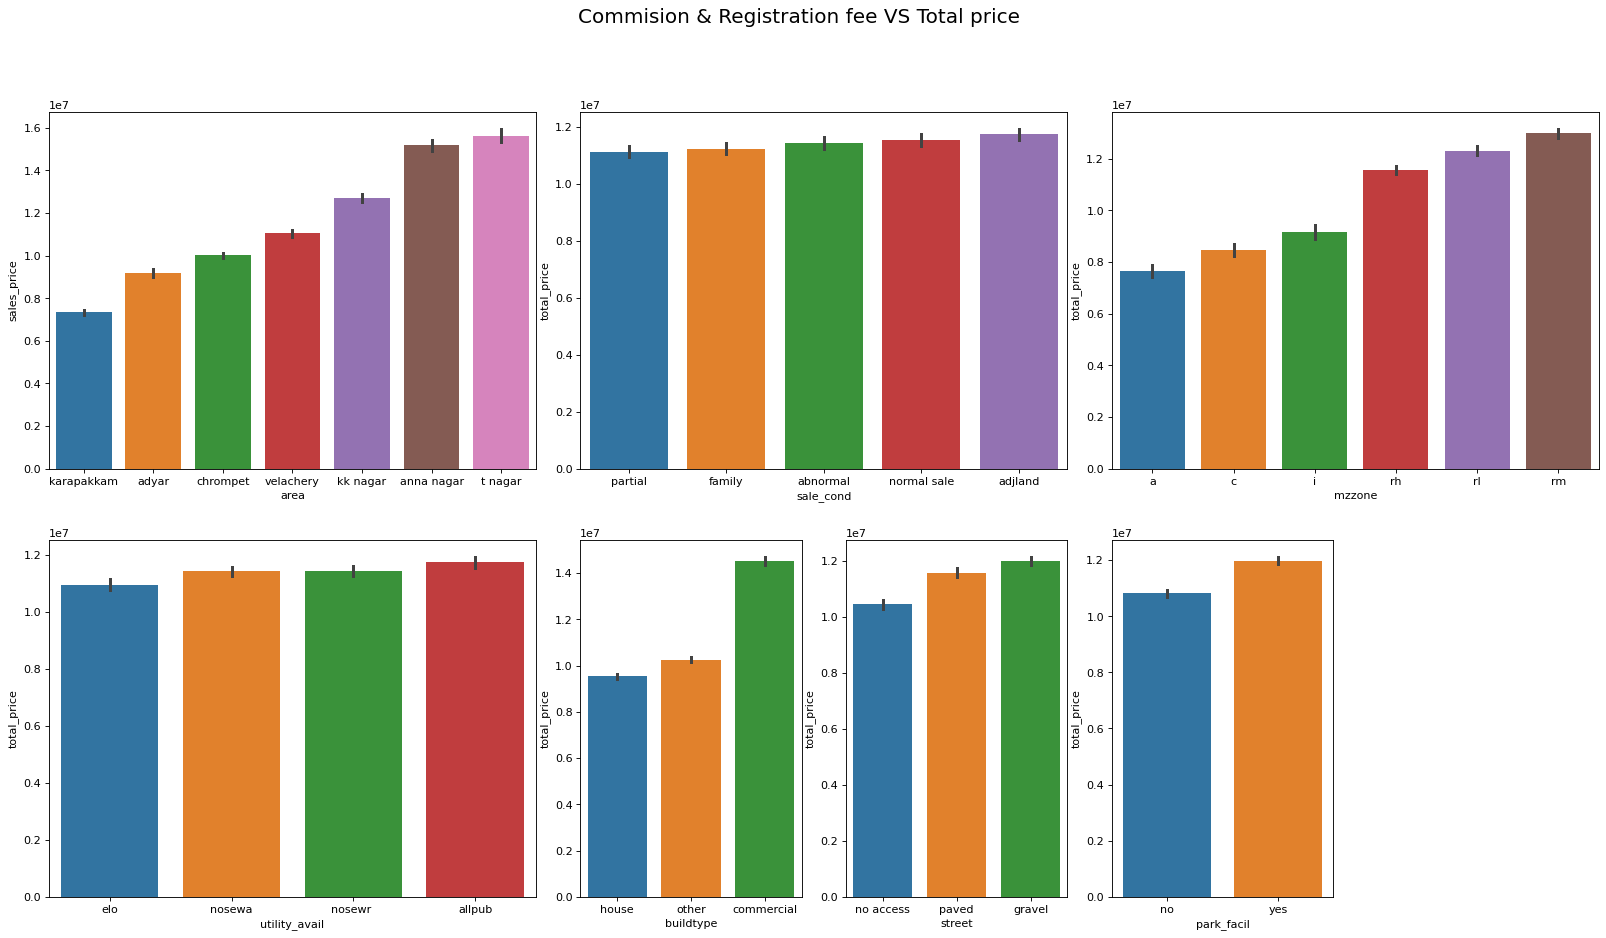

In [9]:
plt.figure(figsize=(25, 13), dpi=80)
# sns.set(style="whitegrid")

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.area,y=data.sales_price,order=data.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])
# plt.title('AREA vs TOTAL_PRICE', fontsize=14)

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.sale_cond,y=data.total_price,order=data.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])
# plt.title('SALE_COND vs TOTAL_PRICE', fontsize=14)

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.mzzone,y=data.total_price,order=data.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])
# plt.title('MZZONE vs TOTAL_PRICE', fontsize=14)

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.utility_avail,y=data.total_price,order=data.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])
# plt.title('UTILITY_AVAIL vs TOTAL_PRICE', fontsize=14)

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=data.buildtype,y=data.total_price,order=data.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])
# plt.title('BUILD_TYPE vs TOTAL_PRICE', fontsize=14)

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=data.street,y=data.total_price,order=data.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])
# plt.title('STREET vs TOTAL_PRICE', fontsize=14)

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=data.park_facil,y=data.total_price,order=data.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])
# plt.title('PARK_FACIL vs TOTAL_PRICE', fontsize=14)
# plt.ticklabel_format(style='plain', axis='y')

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()